In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("customer_churn_data.csv")

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 21)

In [4]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# checking for null values in the dataset
df.isnull().sum()                                    

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

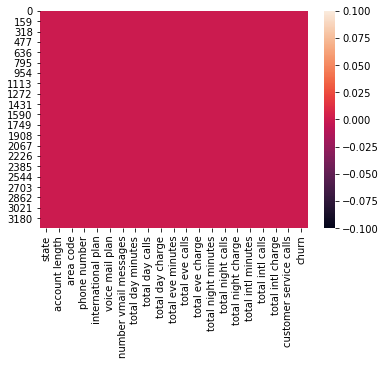

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
# Dropping irrelevant column phone number

df.drop("phone number",axis=1,inplace = True)

In [11]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [12]:
dfcor = df.corr()

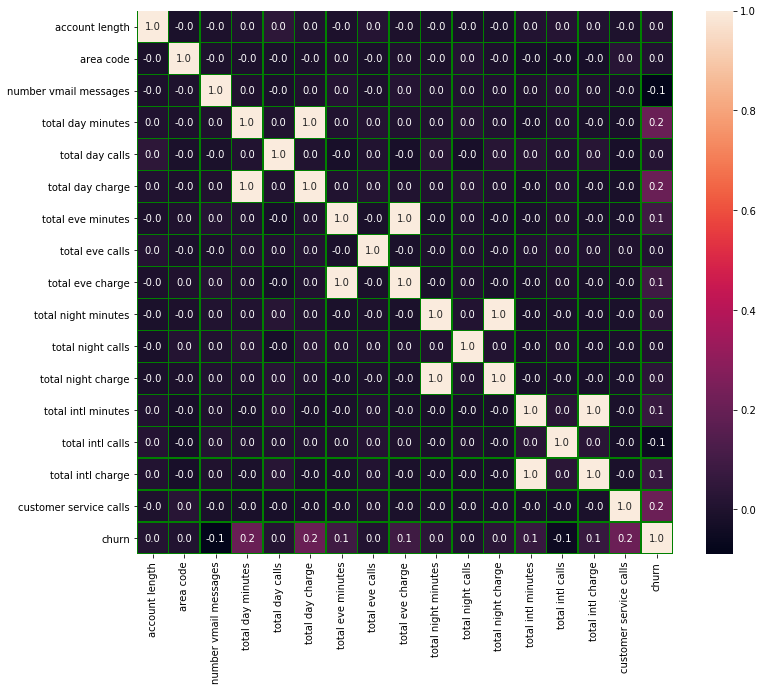

In [13]:
# Checking correlation using heatmap
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

In [14]:
# There is a high correlation between total day minutes,total day calls,total eve minutes,total eve calls with their respective
# charge columns which is quite obvious as charge is nothing but no. of minutes multiplied by a certain amount so these columns
# will act as a reduntant data for our case.So we will drop these columns now

In [15]:
df.drop(columns=["total day charge","total eve charge","total night charge","total intl charge"],inplace=True)

In [16]:
# Visualizing numerical data using Histogram

df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,WV,68,415,no,no,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,RI,28,510,no,no,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,CT,184,510,yes,no,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


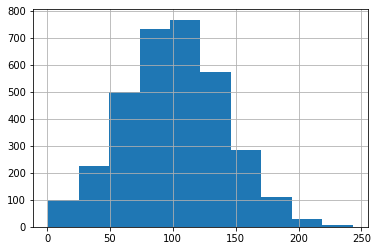

In [17]:
df["account length"].hist()

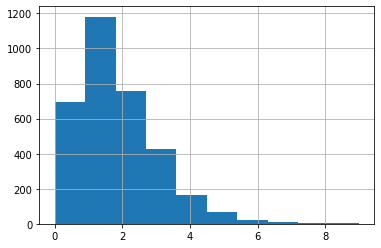

In [18]:
df["customer service calls"].hist()

The no. of calls a customer makes is right skewed i.e. the density is more towards left which shows that only few calls was
 made to the customer care

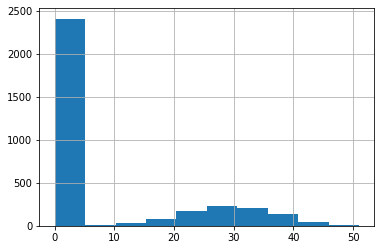

In [19]:
df["number vmail messages"].hist()

so there are very less voice mail messages, only some of them are in the 20 or 30 

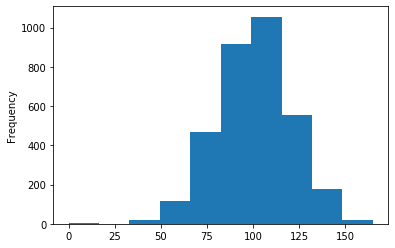

In [20]:
df["total day calls"].plot.hist()

 Total day calls looks more or less normally distributed

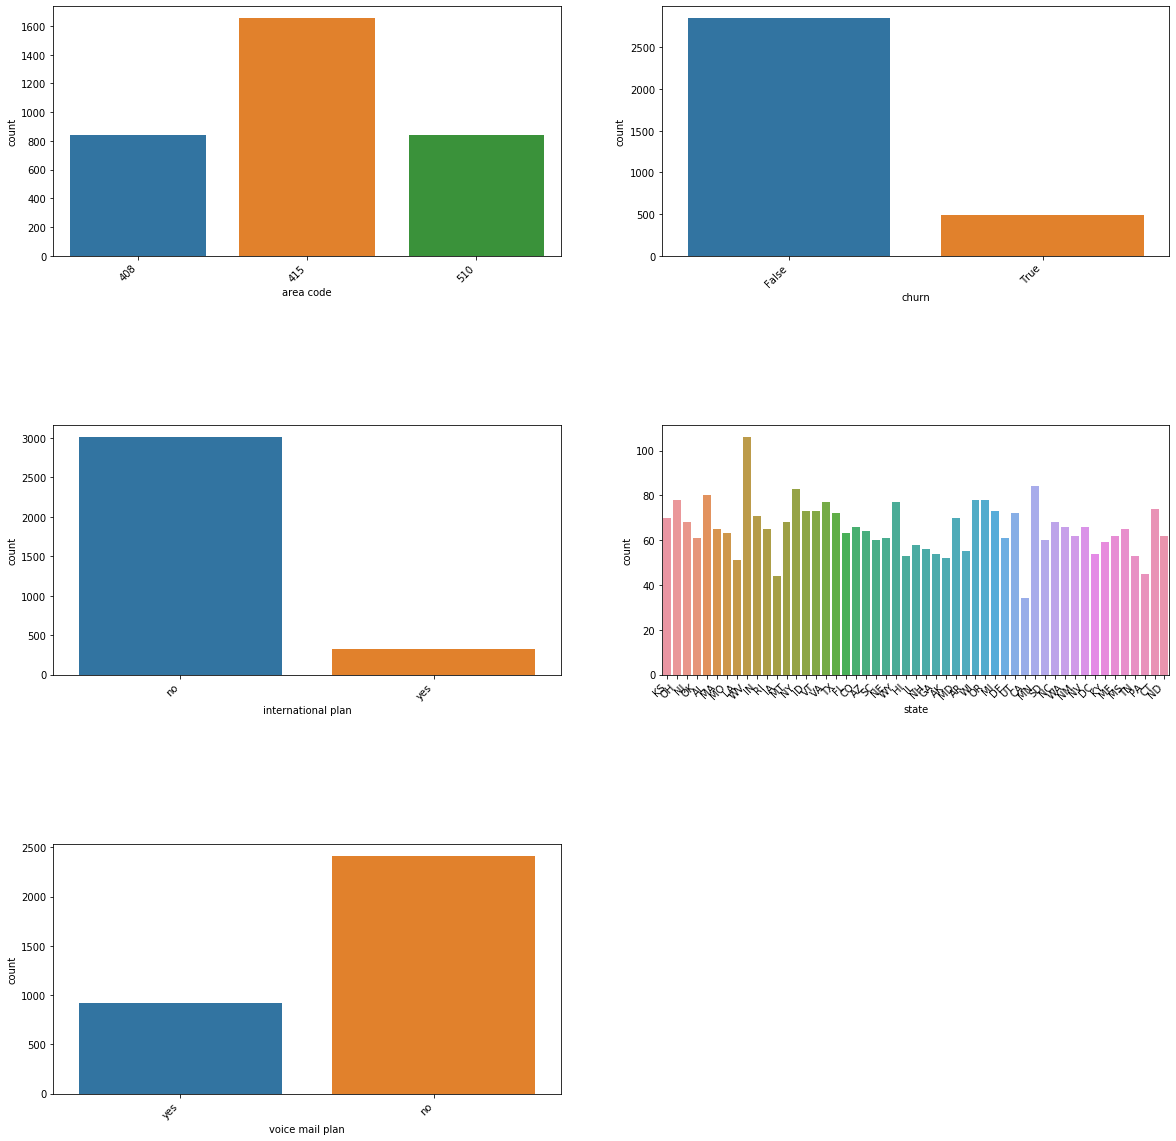

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[2][1])



# area code
ac_plot = sns.countplot(df['area code'], ax=axs[0][0])
ac_plot.set_xticklabels(ac_plot.get_xticklabels(), rotation=45, ha="right")

# Native country
ch_plot = sns.countplot(df['churn'], ax=axs[0][1])
ch_plot.set_xticklabels(ch_plot.get_xticklabels(), rotation=45, ha="right")

# international plan
ip_plot = sns.countplot(df['international plan'],ax=axs[1][0])
ip_plot.set_xticklabels(ip_plot.get_xticklabels(), rotation=45, ha="right")

# state
st_plot = sns.countplot(df['state'], ax=axs[1][1])
st_plot.set_xticklabels(st_plot.get_xticklabels(), rotation=45, ha="right")

# voice mail plan
vo_plot = sns.countplot(df['voice mail plan'], ax=axs[2][0])
vo_plot.set_xticklabels(vo_plot.get_xticklabels(), rotation=45, ha="right")


plt.show()

* So it looks like area code 415 has more data points compared to other one

* Our data set for target variable is also Bias that means we have more people that have not churned

* Majority of the customers didnot have international plan

* Data is more or less equal for all the states

* Majority of the people didnot have voice mail plan

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == object:
        df[column]=le.fit_transform(df[column])

In [23]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,49,68,415,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,39,28,510,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,6,184,510,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


In [24]:
df["churn"]=le.fit_transform(df["churn"])

In [25]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0
3329,49,68,415,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
3330,39,28,510,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0
3331,6,184,510,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0


In [26]:
x=df.drop("churn",axis=1)

y=df["churn"]

In [27]:
print(x.shape)
print(y.shape)

(3333, 15)
(3333,)


In [28]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x= scale.fit_transform(x)

In [29]:
x

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.08500823,
        -0.60119509, -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ...,  1.24048169,
        -0.60119509, -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.70312091,
         0.21153386, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  1.3837779 ,
         0.61789834,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ..., -1.87621082,
         2.24335625,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ...,  1.24048169,
        -0.19483061, -1.1882185 ]])

 Since our data is imbalance so we are using here  StratifiedKFold as it will try to take equal proportion of both the classes
 for each of its fold, basically it will try to shuffle and pickup equal proportion of False class and equal proportion of True
 class

In [30]:
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10, random_state=42)

In [31]:
# Implementing  LogisticRegression



log_clf = LogisticRegression(random_state = 42)

for train_index, test_index in skfolds.split(x,y):
    clone_clf = clone(log_clf)
    x_train_folds = x[train_index]
    y_train_folds = (y[train_index])
    x_test_fold = x[test_index]
    y_test_fold = (y[test_index])
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for Logistic Regression", n_correct / len(y_pred))

Results for Logistic Regression 0.8502994011976048
Results for Logistic Regression 0.8772455089820359
Results for Logistic Regression 0.8682634730538922
Results for Logistic Regression 0.8468468468468469
Results for Logistic Regression 0.8378378378378378
Results for Logistic Regression 0.8708708708708709
Results for Logistic Regression 0.8708708708708709
Results for Logistic Regression 0.8558558558558559
Results for Logistic Regression 0.8648648648648649
Results for Logistic Regression 0.8618618618618619


In [32]:
# Implementing Gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(random_state = 42)

for train_index, test_index in skfolds.split(x,y):
    clone_clf = clone(gb_clf)
    x_train_folds = x[train_index]
    y_train_folds = (y[train_index])
    x_test_fold = x[test_index]
    y_test_fold = (y[test_index])
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for Gradient Boost Classifier", n_correct / len(y_pred))

Results for Gradient Boost Classifier 0.9431137724550899
Results for Gradient Boost Classifier 0.9431137724550899
Results for Gradient Boost Classifier 0.9401197604790419
Results for Gradient Boost Classifier 0.93993993993994
Results for Gradient Boost Classifier 0.960960960960961
Results for Gradient Boost Classifier 0.9519519519519519
Results for Gradient Boost Classifier 0.9579579579579579
Results for Gradient Boost Classifier 0.948948948948949
Results for Gradient Boost Classifier 0.948948948948949
Results for Gradient Boost Classifier 0.960960960960961


In [33]:
# Implementing Support Vector Machine (SVM)

svc_clf = SVC(random_state = 42)

for train_index, test_index in skfolds.split(x,y):
    clone_clf = clone(svc_clf)
    x_train_folds = x[train_index]
    y_train_folds = (y[train_index])
    x_test_fold = x[test_index]
    y_test_fold = (y[test_index])
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for SVM", n_correct / len(y_pred))

Results for SVM 0.9221556886227545
Results for SVM 0.8982035928143712
Results for SVM 0.907185628742515
Results for SVM 0.9039039039039038
Results for SVM 0.918918918918919
Results for SVM 0.9219219219219219
Results for SVM 0.924924924924925
Results for SVM 0.9099099099099099
Results for SVM 0.9159159159159159
Results for SVM 0.924924924924925


In [34]:
# Implementing Random Forest Classifier


rf_clf = RandomForestClassifier(random_state = 42)


for train_index, test_index in skfolds.split(x,y):
    clone_clf = clone(rf_clf)
    x_train_folds = x[train_index]
    y_train_folds = (y[train_index])
    x_test_fold = x[test_index]
    y_test_fold = (y[test_index])
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for  RandomForestClassifier", n_correct / len(y_pred))

Results for  RandomForestClassifier 0.937125748502994
Results for  RandomForestClassifier 0.9491017964071856
Results for  RandomForestClassifier 0.9401197604790419
Results for  RandomForestClassifier 0.933933933933934
Results for  RandomForestClassifier 0.9579579579579579
Results for  RandomForestClassifier 0.9519519519519519
Results for  RandomForestClassifier 0.9459459459459459
Results for  RandomForestClassifier 0.9309309309309309
Results for  RandomForestClassifier 0.93993993993994
Results for  RandomForestClassifier 0.960960960960961


In [35]:
# Implementing KNeighbors Classifier


knn_clf = KNeighborsClassifier()


for train_index, test_index in skfolds.split(x,y):
    clone_clf = clone(knn_clf)
    x_train_folds = x[train_index]
    y_train_folds = (y[train_index])
    x_test_fold = x[test_index]
    y_test_fold = (y[test_index])
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for KNeighborsClassifier", n_correct / len(y_pred))

Results for KNeighborsClassifier 0.8802395209580839
Results for KNeighborsClassifier 0.8772455089820359
Results for KNeighborsClassifier 0.8922155688622755
Results for KNeighborsClassifier 0.8888888888888888
Results for KNeighborsClassifier 0.8828828828828829
Results for KNeighborsClassifier 0.8858858858858859
Results for KNeighborsClassifier 0.9009009009009009
Results for KNeighborsClassifier 0.8798798798798799
Results for KNeighborsClassifier 0.8888888888888888
Results for KNeighborsClassifier 0.8888888888888888


In [36]:
# Implementing  DecisionTreeClassifier



dt_clf = DecisionTreeClassifier(random_state = 42)

for train_index, test_index in skfolds.split(x,y):
    clone_clf = clone(dt_clf)
    x_train_folds = x[train_index]
    y_train_folds = (y[train_index])
    x_test_fold = x[test_index]
    y_test_fold = (y[test_index])
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for DecisionTreeClassifier", n_correct / len(y_pred))

Results for DecisionTreeClassifier 0.9131736526946108
Results for DecisionTreeClassifier 0.907185628742515
Results for DecisionTreeClassifier 0.9281437125748503
Results for DecisionTreeClassifier 0.9129129129129129
Results for DecisionTreeClassifier 0.9369369369369369
Results for DecisionTreeClassifier 0.9309309309309309
Results for DecisionTreeClassifier 0.918918918918919
Results for DecisionTreeClassifier 0.9039039039039038
Results for DecisionTreeClassifier 0.9099099099099099
Results for DecisionTreeClassifier 0.9279279279279279


In [37]:
# Lets evaluate confusion matrix for Gradient Boosting Classifier

y_pred = cross_val_predict(gb_clf,x,y,cv=10)
confusion_matrix(y,y_pred)


array([[2809,   41],
       [ 127,  356]], dtype=int64)

* 2809 are not churn and my code correctly predicted no churns i.e. True Negatives
* 41 were wrongly classified as no churn i.e. False Positive
* 356 were churn and my code correctly identified churn i.e. True Positive
* 127 were not churn but was classified as Churn i.e. False Negative

In [38]:
# Lets find the threshold and plot it against precision-recall

y_scores = cross_val_predict(gb_clf,x,y,cv=10,method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y,y_scores)

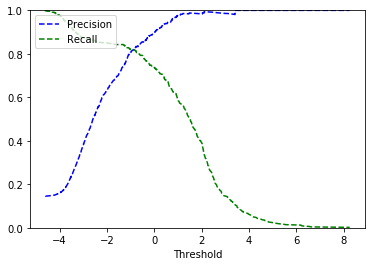

In [39]:
# Plotting the Precision_Recall Curve

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],'g--',label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

 so our precision and recall intersects at 0.8

Text(0, 0.5, 'Precision')

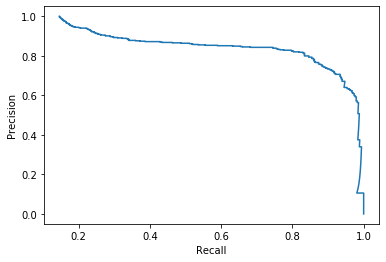

In [40]:
# Better way to plot precision against recall
plt.plot(precisions,recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [41]:
# Lets target for 80% recall

In [42]:
y_scores

array([-2.75478562, -3.28558897, -3.5608808 , ..., -2.96551893,
       -3.34403758, -2.40946088])

In [43]:
# Lets try by using new threshold

# To get to 80% recall , we need a threshold

y_new_scores = (y_scores > -0.5) # -0.5 because roughly around -0.5 we got around 80% of recall
print("The new precision is :", precision_score(y,y_new_scores))
print("The new recall is :", recall_score(y,y_new_scores))

NameError: name 'precision_score' is not defined

In [ ]:
fpr,tpr,thresholds = roc_curve(y,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

so we can  see that ROC curve also looks quite similar to precision curve that means we can have a recall at 0.8

In [ ]:
# Lets evaluate confusion matrix for Support vector Classifier


y_pred = cross_val_predict(svc_clf,x,y,cv=10)
confusion_matrix(y,y_pred)

* 2817 are not churn and my code correctly predicted no churns i.e. True Negatives
* 33 were wrongly classified as no churn i.e. False Positive
* 251 were churn and my code correctly identified churn i.e. True Positive
* 232 were not churn but was classified as Churn i.e. False Negative

In [ ]:
# Lets find the threshold and plot it against precision-recall

y_scores = cross_val_predict(svc_clf,x,y,cv=10,method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y,y_scores)

In [ ]:
# Plotting the Precision_Recall Curve

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],'g--',label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

so our precision and recall intersects at 0.7

In [ ]:
# Better way to plot precision against recall
plt.plot(precisions,recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
# Lets try by using new threshold

# To get to 70% recall , we need a threshold

y_new_scores = (y_scores > -0.5) # -0.5 because roughly around -0.5 we got around 70% of recall
print("The new precision is :", precision_score(y,y_new_scores))
print("The new recall is :", recall_score(y,y_new_scores))

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
# Lets evaluate confusion matrix for Random Forest Classifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(rf_clf,x,y,cv=10)
confusion_matrix(y,y_pred)

* 2832 are not churn and my code correctly predicted no churns i.e. True Negatives
* 18 were wrongly classified as no churn i.e. False Positive
* 166 were churn and my code correctly identified churn i.e. True Positive
* 317 were not churn but was classified as Churn i.e. False Negative

In [ ]:
# Lets find the threshold and plot it against precision-recall

y_scores = cross_val_predict(rf_clf,x,y,cv=10)

from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y,y_scores)

In [ ]:
 #Plotting the Precision_Recall Curve

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],'g--',label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [ ]:
# Better way to plot precision against recall
plt.plot(precisions,recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
# Lets try by using new threshold

# To get to 80% recall , we need a threshold

y_new_scores = (y_scores > 0.75) # -0.5 because roughly around -0.5 we got around 70% of recall
print("The new precision is :", precision_score(y,y_new_scores))
print("The new recall is :", recall_score(y,y_new_scores))

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
from sklearn.externals import joblib

In [ ]:
#Save the model as a pickle in a file
joblib.dump(gb_clf,"gbchurn.pkl")

In [ ]:
model=joblib.load("gbchurn.pkl")